Importamos Librerias

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score
## Uso python 3.11.4

In [393]:
import warnings
warnings.filterwarnings("ignore")

Leemos el Dataset

In [394]:
df = pd.read_csv("../data/okcupid_profiles.csv", sep=(','))
df.head(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


Hacemos un info para ver que tipo de dato tienen cada variable del dataset.

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

Lo análizamos para ver si tiene filas duplicadas

In [396]:
df.duplicated().sum()

0

In [397]:
df.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

### a-Crear nuevo dataset llamado df_red con ciertas variables

Creamos un nuevo dataset llamado df_red.

In [398]:
columnas_seleccionadas = ["age", "status", "sex", "orientation", "body_type", "diet", "drinks", "height", "income", "job"]
df_red = df[columnas_seleccionadas]
df_red.head()

,age,status,sex,orientation,body_type,diet,drinks,height,income,job
0,22,single,m,straight,a little extra,strictly anything,socially,75.0,-1,transportation
1,35,single,m,straight,average,mostly other,often,70.0,80000,hospitality / travel
2,38,available,m,straight,thin,anything,socially,68.0,-1,NaN
3,23,single,m,straight,thin,vegetarian,socially,71.0,20000,student
4,29,single,m,straight,athletic,NaN,socially,66.0,-1,artistic / musical / writer


In [399]:
df_red.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
height             3
income             0
job             8198
dtype: int64

### b- Transformar dataset  en dataset de clasificacion

Llamamos una funcion apply lambda para crear una nueva variable

In [400]:
df_red["is_stem"] = df_red["job"].apply(lambda x: 1 if 'computer / hardware / software' in str(x).lower() or "science / tech / engineering" in str(x).lower() else 0)
df_red.head()

,age,status,sex,orientation,body_type,diet,drinks,height,income,job,is_stem
0,22,single,m,straight,a little extra,strictly anything,socially,75.0,-1,transportation,0
1,35,single,m,straight,average,mostly other,often,70.0,80000,hospitality / travel,0
2,38,available,m,straight,thin,anything,socially,68.0,-1,NaN,0
3,23,single,m,straight,thin,vegetarian,socially,71.0,20000,student,0
4,29,single,m,straight,athletic,NaN,socially,66.0,-1,artistic / musical / writer,0


In [401]:
df_red['is_stem'].unique()

array([0, 1], dtype=int64)

In [402]:
df_red[df_red['is_stem']== 1]

,age,status,sex,orientation,body_type,diet,drinks,height,income,job,is_stem
5,29,single,m,straight,average,mostly anything,socially,67.0,-1,computer / hardware / software,1
19,33,single,m,straight,athletic,mostly anything,socially,72.0,-1,science / tech / engineering,1
31,27,single,m,straight,athletic,anything,socially,72.0,-1,science / tech / engineering,1
32,38,single,f,straight,average,mostly anything,socially,67.0,-1,computer / hardware / software,1
36,32,single,m,straight,athletic,mostly anything,socially,69.0,-1,science / tech / engineering,1
...,...,...,...,...,...,...,...,...,...,...,...
59910,23,single,m,gay,thin,mostly anything,socially,67.0,-1,computer / hardware / software,1
59915,28,single,m,straight,NaN,NaN,socially,70.0,-1,computer / hardware / software,1
59920,22,single,f,straight,NaN,mostly anything,socially,68.0,-1,science / tech / engineering,1
59928,29,single,m,straight,average,mostly anything,socially,75.0,-1,science / tech / engineering,1


Eliminamos del dataset df_red la columna job despues de crear la  columna is_stem

In [403]:
df_red.drop("job", axis=1, inplace=True)
df_red.head()

,age,status,sex,orientation,body_type,diet,drinks,height,income,is_stem
0,22,single,m,straight,a little extra,strictly anything,socially,75.0,-1,0
1,35,single,m,straight,average,mostly other,often,70.0,80000,0
2,38,available,m,straight,thin,anything,socially,68.0,-1,0
3,23,single,m,straight,thin,vegetarian,socially,71.0,20000,0
4,29,single,m,straight,athletic,NaN,socially,66.0,-1,0


## c. Una vez obtenido el DataFrame anterior. 

Calcular el porcentaje de instancias que trabajan en el ambito Stem.

El porcentaje es del 15.94%



In [404]:
porcentaje_stem = df_red["is_stem"].mean() * 100
print(f"Porcentaje de personas que trabajan en STEM: {porcentaje_stem:.2f}%")

Porcentaje de personas que trabajan en STEM: 15.94%


In [405]:
df_red['is_stem'].value_counts(normalize=True)

is_stem
0    0.840573
1    0.159427
Name: proportion, dtype: float64

Creamos dataset nuevo considerando todas las variables del df_red menos is_stem, borramos is _stem y Creamos un pandas serie llamado 'y' a partir del df_red con solo valores de la variable is_stem.

In [406]:
y_column = "is_stem"
X = df_red[[c for c in df_red.columns if c != y_column]]
y = df_red[y_column]
X

,age,status,sex,orientation,body_type,diet,drinks,height,income
0,22,single,m,straight,a little extra,strictly anything,socially,75.0,-1
1,35,single,m,straight,average,mostly other,often,70.0,80000
2,38,available,m,straight,thin,anything,socially,68.0,-1
3,23,single,m,straight,thin,vegetarian,socially,71.0,20000
4,29,single,m,straight,athletic,NaN,socially,66.0,-1
...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,62.0,-1
59942,24,single,m,straight,fit,mostly anything,often,72.0,-1
59943,42,single,m,straight,average,mostly anything,not at all,71.0,100000
59944,27,single,m,straight,athletic,mostly anything,socially,73.0,-1


In [407]:
X.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


### d. Utilizamos el método de Scikit_learn llamado Train_Test_Split para crear dos DataFrames X_train y X_test y dos Series Y_train e Y_test.

Para poder hacer el entrenamiento tenemos que transformar las variables categoricas a númericas y normalizar las variables numericas.

In [408]:
# Lista de columnas para hot encoding
columns_to_encode = ['body_type','status','orientation','sex','diet', 'drinks']
enc = OrdinalEncoder()
X_hot_enconder = X[columns_to_encode]
X_hot_enconder = enc.fit_transform(X_hot_enconder)
X.loc[:, columns_to_encode] = X_hot_enconder


Normalizamos las variables númericas

In [409]:
columns_to_normalize = ['age', 'height', 'income']
another_columns = [c for c in X.columns if c not in columns_to_normalize]

df_normalized = X.copy()
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajustar y transformar
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Restaurar las columnas que no se normalizaron
df_normalized[another_columns] = X[another_columns]

In [410]:
df_normalized

,age,status,sex,orientation,body_type,diet,drinks,height,income
0,0.043478,3.0,1.0,2.0,0.0,10.0,4.0,0.787234,0.000000
1,0.184783,3.0,1.0,2.0,2.0,6.0,2.0,0.734043,0.080001
2,0.217391,0.0,1.0,2.0,10.0,0.0,4.0,0.712766,0.000000
3,0.054348,3.0,1.0,2.0,10.0,17.0,4.0,0.744681,0.020001
4,0.119565,3.0,1.0,2.0,1.0,NaN,4.0,0.691489,0.000000
...,...,...,...,...,...,...,...,...,...
59941,0.445652,3.0,0.0,2.0,NaN,NaN,4.0,0.648936,0.000000
59942,0.065217,3.0,1.0,2.0,4.0,3.0,2.0,0.755319,0.000000
59943,0.260870,3.0,1.0,2.0,2.0,3.0,1.0,0.744681,0.100001
59944,0.097826,3.0,1.0,2.0,1.0,3.0,4.0,0.765957,0.000000


El tamaño del conjunto de test deberá ser el 30% del tamaño del dataset original. La semilla de números aleatorios deberá ser igual a 42. 

In [411]:
# por defecto hace de manera estratificada el train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_normalized, y, test_size=0.3, random_state=42) 
print(X_train.shape, X_test.shape, y_train.shape[0], y_test.shape[0])

(41962, 9) (17984, 9) 41962 17984


Creamos una nueva variable con el Train  y el Test para destransformar las variables categoricas y poder representarlas graficamente

In [412]:
X_train_to_vizualize = X_train.copy()
X_test_to_vizualize = X_test.copy()
X_train_to_vizualize[columns_to_encode] = enc.inverse_transform(X_train_to_vizualize[columns_to_encode])
X_test_to_vizualize[columns_to_encode] = enc.inverse_transform(X_test_to_vizualize[columns_to_encode])

X_train_to_vizualize[columns_to_normalize] = scaler.inverse_transform(X_train_to_vizualize[columns_to_normalize])
X_test_to_vizualize[columns_to_normalize] = scaler.inverse_transform(X_test_to_vizualize[columns_to_normalize])

X_test_to_vizualize.head()

,age,status,sex,orientation,body_type,diet,drinks,height,income
4800,26.0,single,m,straight,average,anything,socially,70.0,20000.0
56896,37.0,single,m,gay,athletic,NaN,socially,70.0,-1.0
17834,30.0,single,m,straight,fit,anything,socially,65.0,-1.0
27275,26.0,single,m,straight,average,mostly anything,socially,69.0,-1.0
3335,33.0,single,m,straight,average,strictly anything,often,66.0,-1.0


In [413]:
df_normalized.head(20)

,age,status,sex,orientation,body_type,diet,drinks,height,income
0,0.043478,3.0,1.0,2.0,0.0,10.0,4.0,0.787234,0.000000
1,0.184783,3.0,1.0,2.0,2.0,6.0,2.0,0.734043,0.080001
2,0.217391,0.0,1.0,2.0,10.0,0.0,4.0,0.712766,0.000000
3,0.054348,3.0,1.0,2.0,10.0,17.0,4.0,0.744681,0.020001
4,0.119565,3.0,1.0,2.0,1.0,NaN,4.0,0.691489,0.000000
5,0.119565,3.0,1.0,2.0,2.0,3.0,4.0,0.702128,0.000000
6,0.152174,3.0,0.0,2.0,4.0,10.0,4.0,0.680851,0.000000
7,0.141304,3.0,0.0,2.0,2.0,3.0,4.0,0.680851,0.000000
8,0.065217,3.0,0.0,2.0,NaN,10.0,4.0,0.702128,0.000000
9,0.206522,3.0,1.0,2.0,1.0,3.0,1.0,0.680851,0.000000


In [414]:
print(X_train.shape,X_test.shape)

(41962, 9) (17984, 9)


In [415]:
y_train.sum()/y_train.count()

0.15959677803727182

In [416]:
y_test.sum()/y_test.count()

0.1590302491103203

e. Comprobar que las proporciones de instancias que trabajan en el ámbito STEM en el subconjunto de entrenamiento y en el subconjunto de test son similares

In [417]:
y_train.sum()/y_train.count()

0.15959677803727182

In [418]:
y_test.sum()/y_test.count()

0.1590302491103203

In [419]:
print(X_train.shape,X_test.shape)

(41962, 9) (17984, 9)


Hemos comprobado que las proporciones si son similares

f. Calcula, para el conjunto de entrenamiento y para el conjunto de test, las
distribuciones de las variables “age”, “orientation”, “body_type”, “height” e
“income”. ¿Son las distribuciones del conjunto de test iguales a las del
conjunto de entrenamiento en todos los casos? Representa las distribuciones
con histogramas o gráfico de barras, según el tipo de variable. Cada
histograma o gráfico de barras debe corresponder a una variable, y se
deben representar las distribuciones de test y de entrenamiento. Para hacer
más legible la representación, representa las distribuciones con un valor de
alpha (transparencia) de 0.7. ¿Hace falta que las dos distribuciones sean
iguales en todos los casos? ¿Qué consideraciones deberemos tomar para no
obtener métricas distorsionadas respecto de la realidad? Tened en cuenta
que, al tener los conjuntos de entrenamiento tamaños distintos, tanto los
histogramas como los gráficos de barras deben estar normalizados. ¿Qué
ocurre cuando se representan sin normalizar?

### ¿Son las distribuciones del conjunto de test iguales a las del conjunto de entrenamiento en todos los casos?

Las distribuciones no son iguales , las distribuciones de entrenamiento son más grandes ya que para hacer el test utilizamos solo el 30% de los datos


### Representación grafica de las variables que utilizamos para hacer el Train y el Test  Normalizadas y No normalizadas


In [420]:
def visualize_column(column_name):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Primer gráfico para datos normalizados
    axes[0].hist(X_train[column_name], bins=90, alpha=0.7, label='X_train', color='red')
    axes[0].hist(X_test[column_name], bins=90, alpha=0.7, label='X_test', color='black')
    axes[0].set_title(f'{column_name.capitalize()} Test vs Train (Normalized)')
    axes[0].set_xlabel(column_name.capitalize())
    axes[0].set_ylabel('Frequency')
    axes[0].legend(loc='upper right')

    # Segundo gráfico para datos no normalizados
    axes[1].hist(X_train_to_vizualize[column_name], bins=90, alpha=0.7, label='X_train', color='red')
    axes[1].hist(X_test_to_vizualize[column_name], bins=90, alpha=0.7, label='X_test', color='black')
    axes[1].set_title(f'{column_name.capitalize()} Test vs Train (No Normalized)')
    axes[1].set_xlabel(column_name.capitalize())
    axes[1].set_ylabel('Frequency')
    axes[1].legend(loc='upper right')

    # Ajustamos el espacio entre subgráficos para evitar superposiciones
    plt.tight_layout()
    plt.show()

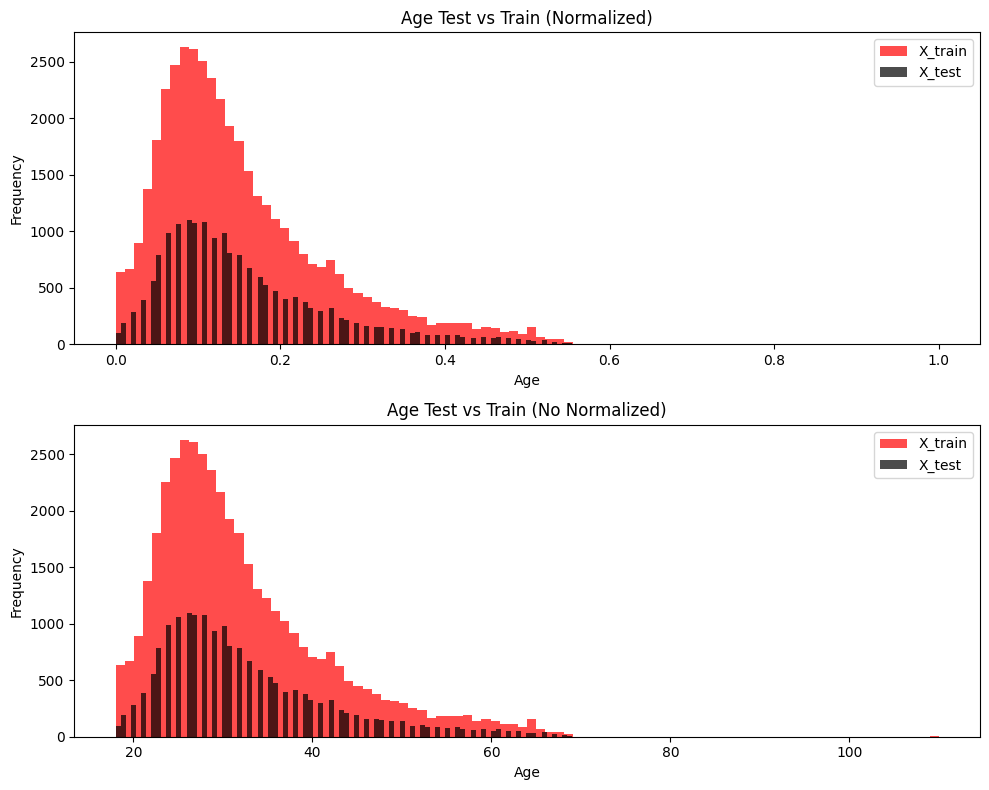

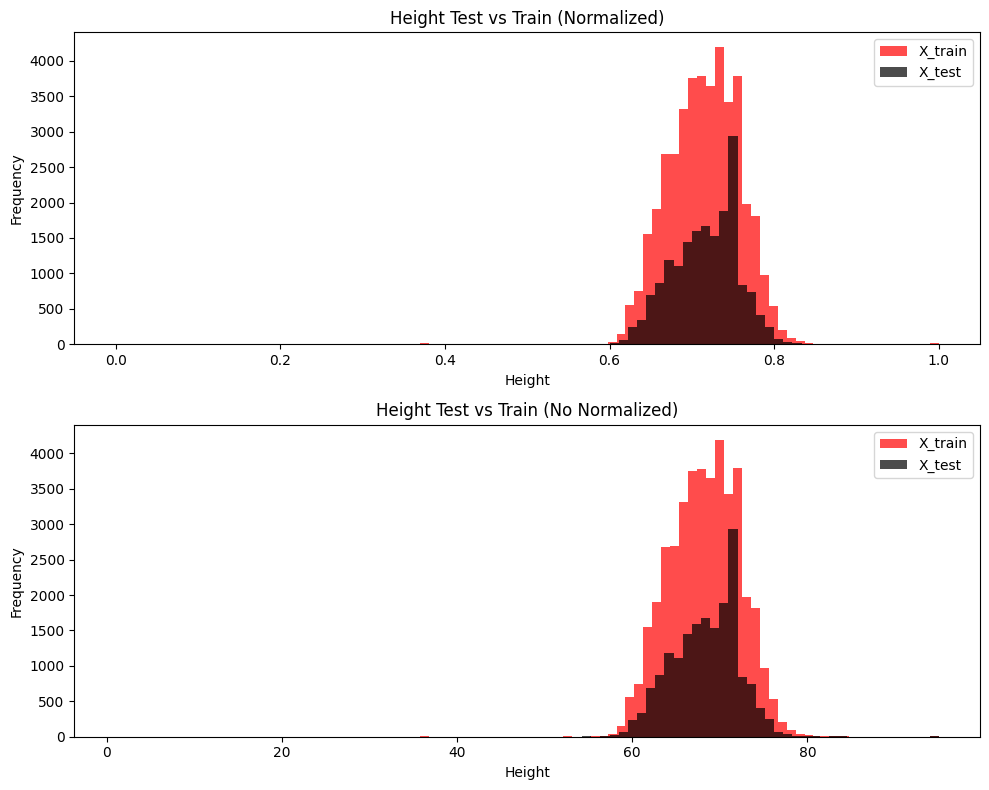

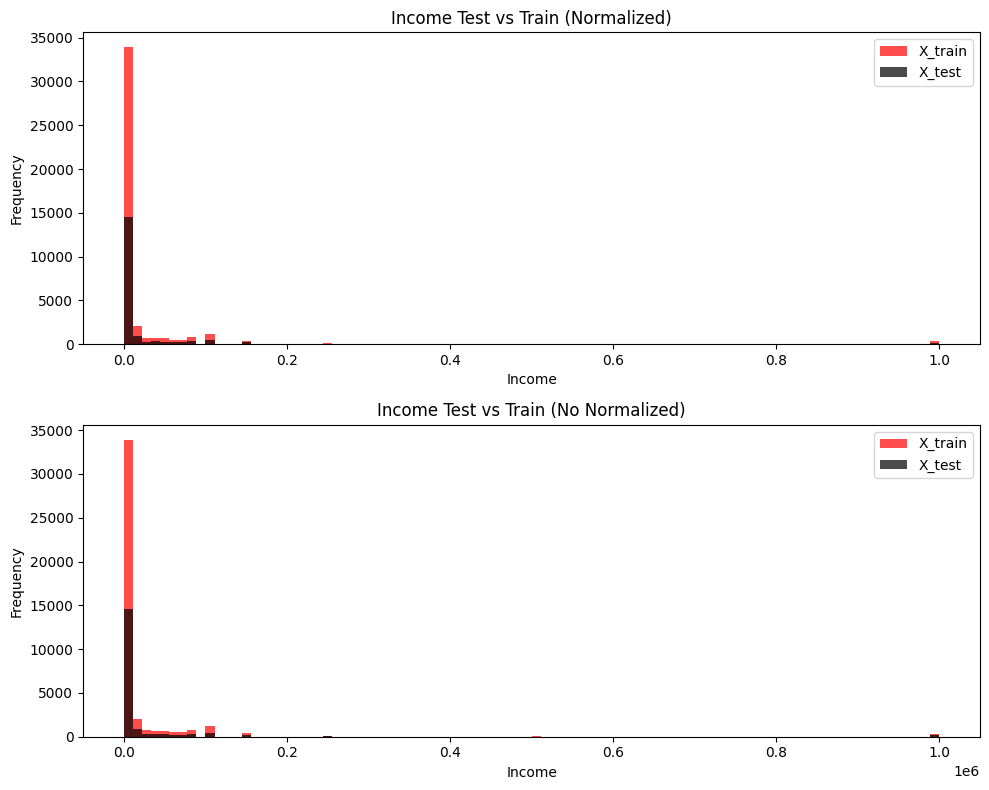

In [421]:
visualize_column('age')
visualize_column('height')
visualize_column("income")

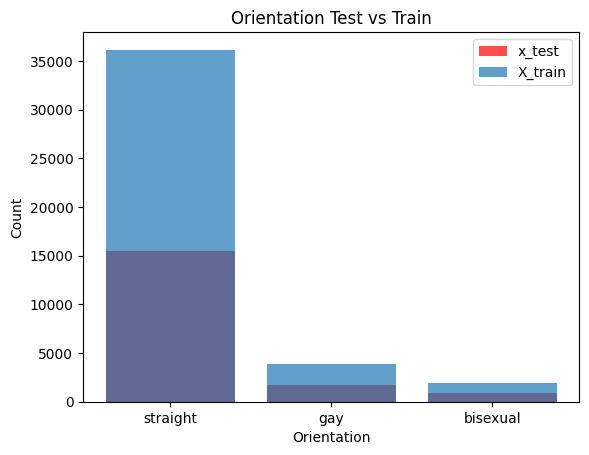

In [422]:

orientation_counts_test = X_test_to_vizualize['orientation'].value_counts()
orientation_counts_train = X_train_to_vizualize['orientation'].value_counts()

# Crear un gráfico de barras para x_test
plt.bar(
    orientation_counts_test.index,
    orientation_counts_test,
    alpha=0.7,
    label='x_test',
    color='red'
)

# Crear un gráfico de barras para X_train
plt.bar(orientation_counts_train.index, orientation_counts_train, alpha=0.7, label='X_train')

plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation Test vs Train')
plt.legend(loc='upper right')

plt.show()


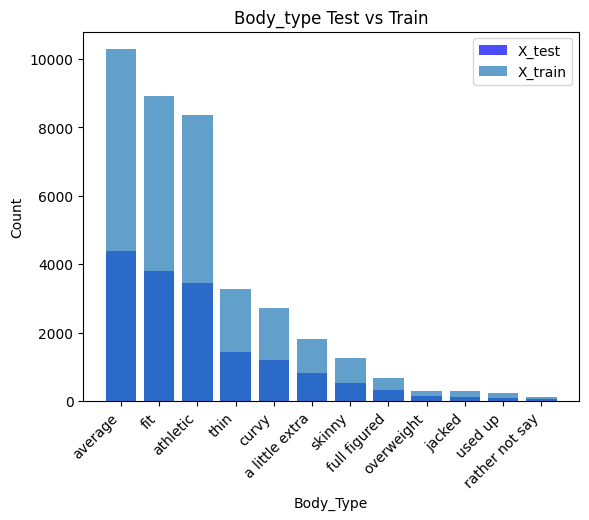

In [423]:
body_type_count_test = X_test_to_vizualize['body_type'].value_counts()
body_type_count_train = X_train_to_vizualize['body_type'].value_counts()
plt.bar(body_type_count_test.index, body_type_count_test, alpha=0.7, label='X_test', color='blue')

plt.bar(body_type_count_train.index, body_type_count_train, alpha=0.7, label='X_train')
        
# Agregar etiquetas y leyenda

plt.xlabel('Body_Type')
plt.ylabel('Count')
plt.title('Body_type Test vs Train')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right') 
plt.show()

### ¿Qué consideraciones deberemos tomar para no obtener métricas distorsionadas respecto de la realidad?


Obtener métricas precisas y representativas es fundamental para tomar decisiones informadas y comprender correctamente la realidad.

Definición clara de objetivos: Antes de recopilar datos y métricas, asegúrarse de tener una comprensión clara de los objetivos que se esta tratando de medir,definir claramente qué indicadores son importantes y relevantes para el análisis.

Transparencia y comunicación: Comunicar de manera transparente cómo se recopilaron y calcularon las métricas. La transparencia facilita la comprensión y la confianza en los resultados.

### Que pasa cuando se representan el entrenamiento con los datos sin normalizar?

Cuando se representan datos sin normalizar, puede haber  implicaciones que afectan la interpretación y comparación de las métricas. Las variables con diferentes escalas pueden tener un impacto desigual en los resultados del análisis. Al no normalizar, las variables con valores numéricos más grandes pueden dominar y tener un peso excesivo en comparación con las variables de escala más pequeña. Las variables con diferentes escalas pueden tener un impacto desigual en los resultados del análisis. 

la normalización es un paso importante en el preprocesamiento de datos que puede mejorar la consistencia y la interpretabilidad de los resultados en análisis estadísticos y modelos de aprendizaje automático. Sin embargo, es importante señalar que no siempre es necesario normalizar en todos los casos, y la decisión puede depender del contexto específico y los objetivos del análisis.